# **Aula Prática - 1**
Vamos ver exemplos de implementação de agrupamento com o algoritmo K-means

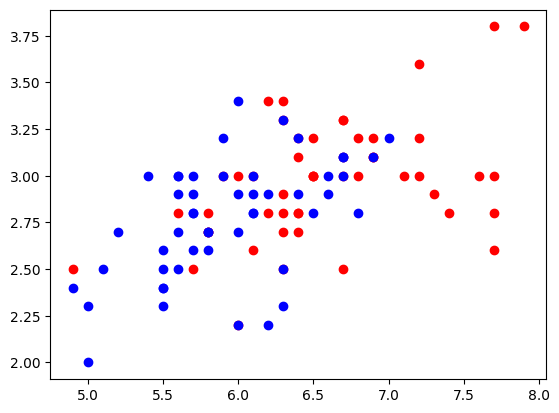

In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

xcls0 = X[y==0]
xcls1 = X[y==2]

plt.scatter(xcls1[:,0], xcls1[:,1], color='r')
plt.scatter(xcls0[:,0], xcls0[:,1], color='b')
plt.show()

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import math

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters = 2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [12]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [13]:
x_tst = np.array([[0, 0], [12, 3]])
predVals = kmeans.predict(x_tst)
predVals

array([1, 0])

In [14]:
np.random.seed(5)
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

In [15]:
from mpl_toolkits.mplot3d import Axes3D

def plotFigure(X, name, est, fignum, titles):
  fig = plt.figure(fignum, figsize=(4,3))
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
  est.fit(X)
  labels = est.labels_
  ax.scatter(X[:,3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')
  ax.dist = 12
  fignum = fignum + 1
  return fignum

In [16]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)), 
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_3_ma_init', KMeans(n_clusters=3, n_init=1))]
fignum = 1
titles = ['8 grupos', '3 grupos', '3 grupos ruim']
for name, est in estimators:
  fignum = plotFigure(X, name, est, fignum, titles)
#fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16456\158553639.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:,3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')
C:\Users\User\AppData\Local\Temp\ipykernel_16456\158553639.py:9: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12
C:\Users\User\AppData\Local\Temp\ipykernel_16456\158553639.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

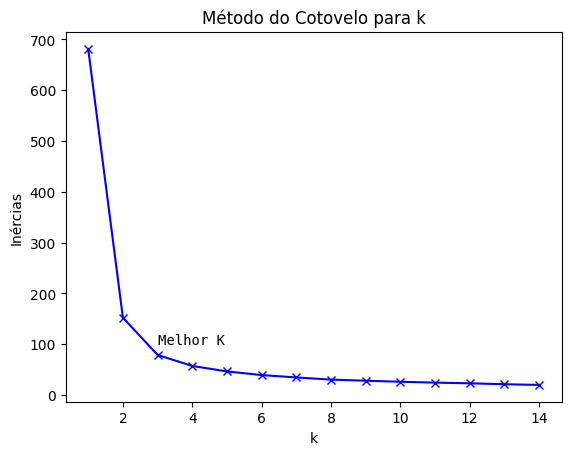

In [17]:
inercias = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  inercias.append(km.inertia_)
plt.plot(K, inercias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inércias')
plt.title('Método do Cotovelo para k')
plt.text(3, 100, 'Melhor K', family='monospace', fontsize=10)
plt.show()